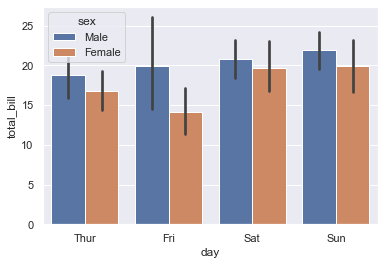

In [45]:
# This python script visulize the mean error square of parameter 4 to 14 
# for both gfp_mcherry and gfp_nir overlap with the actual flow data

import pandas as pd
import seaborn as sns
sns.set_theme()
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

In [46]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv ('Output.csv')
df = df.melt(id_vars=["well", "para"], 
        var_name="Type", 
        value_name="Value")
df

,well,para,Type,Value
0,A01,4_4,gfp_mcherry,14.387597
1,A01,4_6,gfp_mcherry,11.410853
2,A01,4_8,gfp_mcherry,9.565891
3,A01,4_10,gfp_mcherry,8.170543
4,A01,4_12,gfp_mcherry,7.085271
...,...,...,...,...
1435,B12,14_6,gfp_nir,53.247863
1436,B12,14_8,gfp_nir,44.700855
1437,B12,14_10,gfp_nir,38.376068
1438,B12,14_12,gfp_nir,33.675214


In [47]:
df2 = pd.read_csv ('210901_flow_results.csv')
df2 = df2.melt(id_vars="well", 
        var_name="Type", 
        value_name="Benchmark")
df2

,well,Type,Benchmark
0,A01,gfp_mcherry,0.000000
1,A02,gfp_mcherry,8.184471
2,A03,gfp_mcherry,1.069152
3,A04,gfp_mcherry,0.114527
4,A05,gfp_mcherry,0.223964
5,A06,gfp_mcherry,0.214080
6,A07,gfp_mcherry,0.000000
7,A10,gfp_mcherry,0.037451
8,A11,gfp_mcherry,0.000000
9,A12,gfp_mcherry,0.030807


In [48]:
mergetable = df.merge(df2, how='outer', on=['well','Type'])
mergetable

,well,para,Type,Value,Benchmark
0,A01,4_4,gfp_mcherry,14.387597,0.00000
1,A01,4_6,gfp_mcherry,11.410853,0.00000
2,A01,4_8,gfp_mcherry,9.565891,0.00000
3,A01,4_10,gfp_mcherry,8.170543,0.00000
4,A01,4_12,gfp_mcherry,7.085271,0.00000
...,...,...,...,...,...
1435,B12,14_6,gfp_nir,53.247863,0.02059
1436,B12,14_8,gfp_nir,44.700855,0.02059
1437,B12,14_10,gfp_nir,38.376068,0.02059
1438,B12,14_12,gfp_nir,33.675214,0.02059


In [49]:
mergetable['MSE'] = (abs(mergetable['Value']-mergetable['Benchmark']))**2 
mergetable = mergetable[['para','Type','MSE']]
mergetable

,para,Type,MSE
0,4_4,gfp_mcherry,207.002945
1,4_6,gfp_mcherry,130.207560
2,4_8,gfp_mcherry,91.506280
3,4_10,gfp_mcherry,66.757767
4,4_12,gfp_mcherry,50.201070
...,...,...,...
1435,14_6,gfp_nir,2833.142617
1436,14_8,gfp_nir,1996.326054
1437,14_10,gfp_nir,1471.142721
1438,14_12,gfp_nir,1132.633695


In [63]:
grouby_data = mergetable.groupby(['para', 'Type'])['MSE'].mean().reset_index()
grouby_data

,para,Type,MSE
0,10_10,gfp_mcherry,1838.709879
1,10_10,gfp_nir,270.813642
2,10_12,gfp_mcherry,1469.936604
3,10_12,gfp_nir,214.613037
4,10_14,gfp_mcherry,1230.988153
...,...,...,...
67,8_4,gfp_nir,373.478479
68,8_6,gfp_mcherry,2078.188388
69,8_6,gfp_nir,250.370329
70,8_8,gfp_mcherry,1521.959041


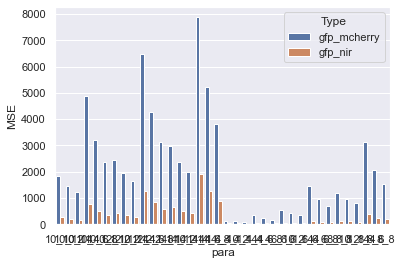

In [65]:
ax = sns.barplot(x="para", y="MSE", hue="Type", data=grouby_data)

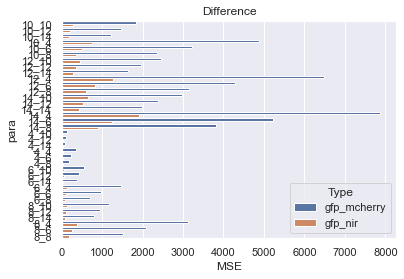

In [86]:
ax = sns.barplot(x="MSE", y="para", hue="Type", data=grouby_data).set_title('Difference')

In [79]:
# Now comparing the ratio of gfp_mcherry to gfp_nir
import numpy as np
df3 = pd.read_csv ('210901_flow_results.csv')
df3['ratio_benchmark'] = df3['gfp_mcherry']/df3['gfp_nir']
df3 = df3.replace([np.inf, -np.inf], np.nan)
df3 = df3.dropna()
df3 = df3[['well','ratio_benchmark']]
df3

,well,ratio_benchmark
0,A01,0.000000
1,A02,2.086331
2,A03,0.084171
3,A04,0.126991
4,A05,0.087952
5,A06,0.043601
7,A10,2.082115
8,A11,0.000000
11,B02,1.342838
12,B03,0.079711


In [81]:
df4 = pd.read_csv ('Output.csv')
df4['ratio_generated'] = df4['gfp_mcherry']/df4['gfp_nir']
df4 = df4.replace([np.inf, -np.inf], np.nan)
df4 = df4.dropna()
df4 = df4[['well','para','ratio_generated']]
df4

,well,para,ratio_generated
0,A01,4_4,2.717762
1,A01,4_6,2.769463
2,A01,4_8,2.828171
3,A01,4_10,2.925315
4,A01,4_12,2.980685
...,...,...,...
715,B12,14_6,2.310907
716,B12,14_8,2.312927
717,B12,14_10,2.437960
718,B12,14_12,2.496429


In [83]:
merge_ratio = df3.merge(df4, how='outer', on='well')
merge_ratio = merge_ratio.dropna()
merge_ratio

,well,ratio_benchmark,para,ratio_generated
0,A01,0.0,4_4,2.717762
1,A01,0.0,4_6,2.769463
2,A01,0.0,4_8,2.828171
3,A01,0.0,4_10,2.925315
4,A01,0.0,4_12,2.980685
...,...,...,...,...
571,B12,0.0,14_6,2.310907
572,B12,0.0,14_8,2.312927
573,B12,0.0,14_10,2.437960
574,B12,0.0,14_12,2.496429


In [85]:
merge_ratio['MSE'] = (abs(merge_ratio['ratio_generated']-merge_ratio['ratio_benchmark']))**2 
merge_ratio = merge_ratio[['para','MSE']]
merge_ratio

,para,MSE
0,4_4,7.386230
1,4_6,7.669927
2,4_8,7.998548
3,4_10,8.557468
4,4_12,8.884484
...,...,...
571,14_6,5.340290
572,14_8,5.349633
573,14_10,5.943649
574,14_12,6.232160


In [87]:
ratio_grouby = merge_ratio.groupby('para')['MSE'].mean().reset_index()
ratio_grouby

,para,MSE
0,10_10,4.444140
1,10_12,4.537266
2,10_14,4.601000
3,10_4,4.327872
4,10_6,4.143888
5,10_8,4.305434
6,12_10,3.228210
7,12_12,3.304395
8,12_14,3.352356
9,12_4,3.143655


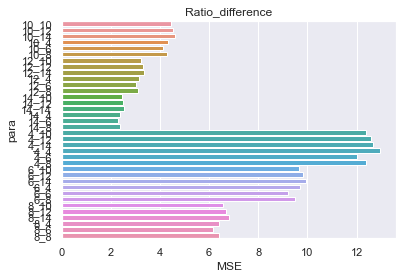

In [89]:
ax = sns.barplot(x="MSE", y="para", data=ratio_grouby).set_title('Ratio_difference')